___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [10]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [11]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [14]:
X_train.shape

(60000, 28, 28)

In [13]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

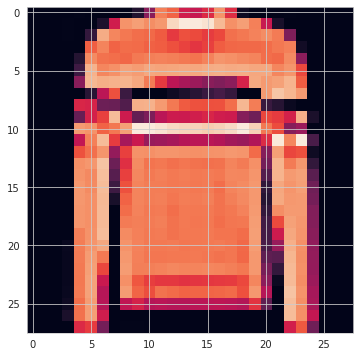

In [15]:
plt.imshow(X_train[5])

In [16]:
y_train[5]

2

In [17]:
y_train[5].shape

()

In [18]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [21]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [22]:
y_train[0]

9

In [24]:
classes[y_train[0]]

'Ankle boot'

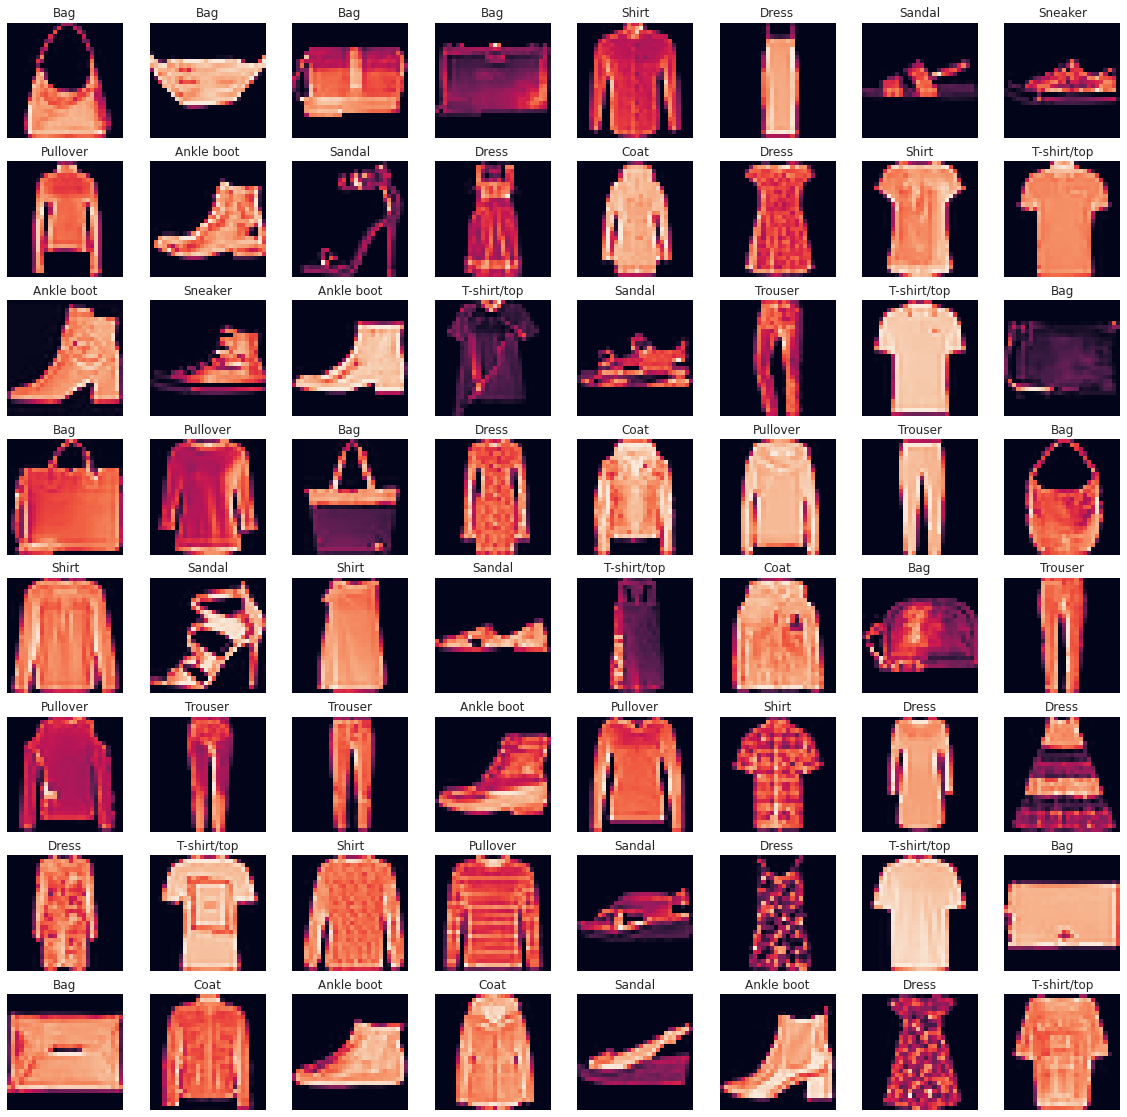

In [25]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [26]:
X_train[5].min()

0

In [27]:
X_train[5].max()

255

In [28]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [29]:
X_train[5].min()

0.0

In [30]:
X_train[5].max()

1.0

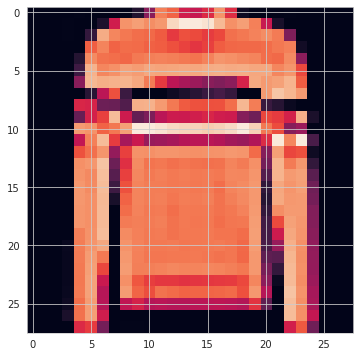

In [31]:
plt.imshow(X_train[5])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [32]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [35]:
X_train = X_train.reshape(60000, 28, 28, 1)

In [36]:
X_test = X_test.reshape(10000, 28, 28, 1)


In [38]:
X_train.shape

(60000, 28, 28, 1)

In [39]:
X_test.shape

(10000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [40]:
from tensorflow.keras.utils import to_categorical

In [44]:
Y_train = to_categorical(y_train,10) 
Y_test = to_categorical(y_test,10)
Y_test.shape

(10000, 10)

In [45]:
y_train[0]

9

In [46]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [48]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=48, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 48)        12144     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 48)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2352)              0         
                                                                 
 dense (Dense)               (None, 128)               3

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [50]:
from tensorflow.keras.callbacks import EarlyStopping

In [51]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [52]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])


Epoch 1/10
1875/1875 [==============================] - 65s 34ms/step - loss: 0.4043 - accuracy: 0.8550 - val_loss: 0.3637 - val_accuracy: 0.8692
Epoch 2/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2654 - accuracy: 0.9025 - val_loss: 0.2751 - val_accuracy: 0.9005
Epoch 3/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2207 - accuracy: 0.9191 - val_loss: 0.2880 - val_accuracy: 0.9010
Epoch 4/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.1899 - accuracy: 0.9301 - val_loss: 0.2346 - val_accuracy: 0.9137
Epoch 5/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1638 - accuracy: 0.9385 - val_loss: 0.2520 - val_accuracy: 0.9147
Epoch 6/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1411 - accuracy: 0.9471 - val_loss: 0.2453 - val_accuracy: 0.9156


**TASK 7: Plot values of metrics you used in your model.**

In [53]:
model.metrics_names

['loss', 'accuracy']

In [55]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.404,0.855,0.364,0.869
1,0.265,0.903,0.275,0.900
2,0.221,0.919,0.288,0.901
3,0.190,0.930,0.235,0.914
4,0.164,0.939,0.252,0.915
5,0.141,0.947,0.245,0.916


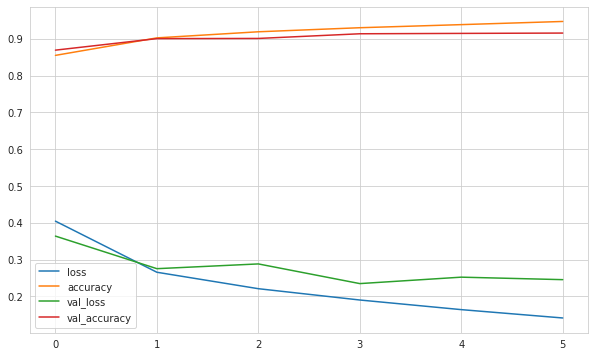

In [59]:
summary.plot();

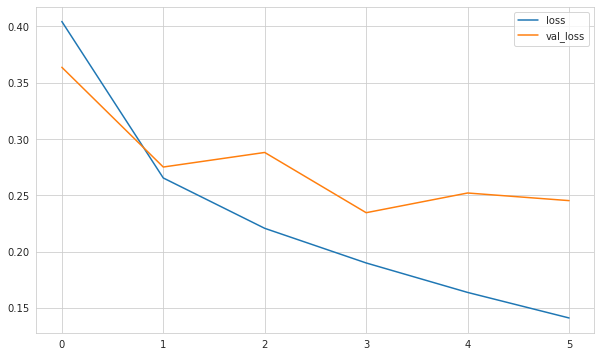

In [56]:
summary[["loss", "val_loss"]].plot();

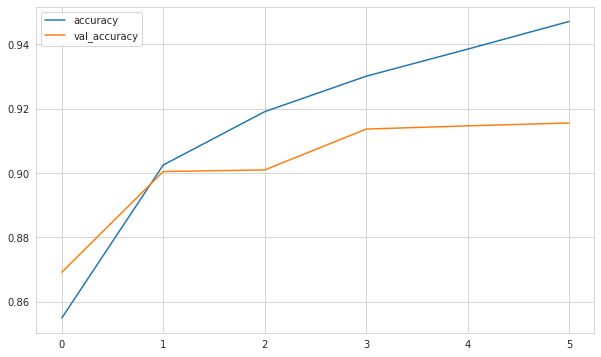

In [57]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [60]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [61]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.2346 - accuracy: 0.9137


[0.23455026745796204, 0.9136999845504761]

In [62]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.23455026745796204
Test accuracy: 0.9136999845504761


In [63]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 3s 10ms/step


array([[5.7072680e-07, 3.1833405e-08, 6.2748586e-07, ..., 1.0001926e-03,
        3.5083867e-06, 9.9893528e-01],
       [1.1634087e-04, 3.9053685e-09, 9.9811202e-01, ..., 4.0646250e-11,
        5.9107553e-08, 3.7662002e-09],
       [2.1055186e-08, 9.9999994e-01, 1.1644551e-09, ..., 2.6871983e-14,
        1.9339630e-10, 2.8163209e-14],
       ...,
       [2.6336235e-07, 3.3167889e-11, 1.2369377e-07, ..., 1.1550364e-08,
        9.9999374e-01, 6.4925197e-11],
       [2.8421323e-07, 9.9999100e-01, 1.2174984e-07, ..., 4.2618197e-11,
        1.1077316e-08, 1.4153261e-10],
       [1.4824712e-03, 4.0485628e-04, 1.1859933e-03, ..., 1.2084399e-01,
        5.5717300e-03, 2.2532798e-03]], dtype=float32)

In [64]:
y_pred = np.argmax(pred_prob, axis=1)

In [65]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1000
           1       0.99      0.99      0.99      1000
           2       0.91      0.82      0.87      1000
           3       0.93      0.91      0.92      1000
           4       0.86      0.86      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.70      0.81      0.75      1000
           7       0.97      0.96      0.97      1000
           8       0.99      0.99      0.99      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



In [67]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [68]:
print(confusion_matrix(y_test, y_pred))

[[845   1   8  16   4   1 119   0   6   0]
 [  0 988   0   9   0   0   2   0   1   0]
 [ 13   1 824   6  53   0 103   0   0   0]
 [ 10   3   7 908  40   0  32   0   0   0]
 [  0   1  37  10 858   0  93   0   1   0]
 [  0   0   0   0   0 978   0   8   0  14]
 [ 78   3  28  26  47   0 814   0   4   0]
 [  0   0   0   0   0  10   0 965   0  25]
 [  3   1   0   4   1   1   3   1 986   0]
 [  1   0   0   0   0   3   0  25   0 971]]


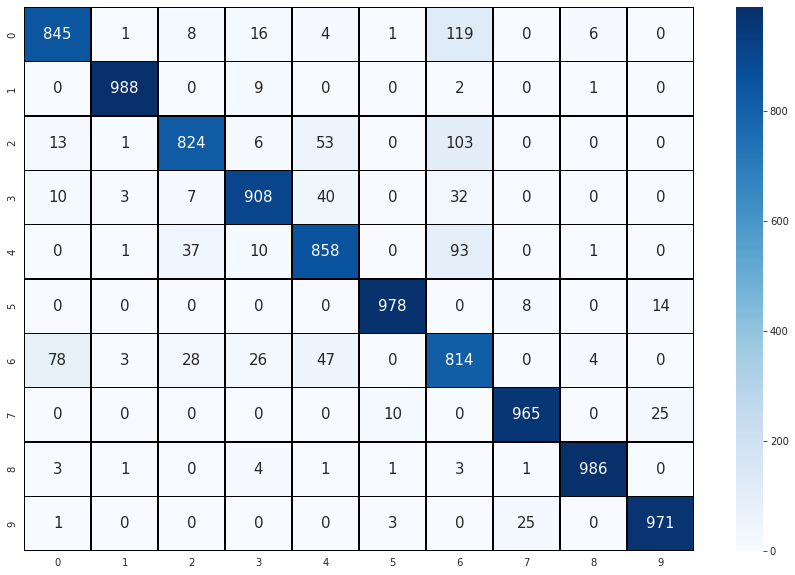

In [72]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15});

## Prediction

In [112]:
my_image = X_test[5]

In [113]:
my_image.shape

(28, 28, 1)

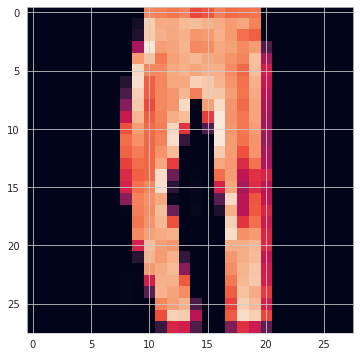

In [115]:
plt.imshow(my_image.reshape(28,28));

In [120]:
image_prediction= model.predict(my_image.reshape(1,28,28,1))
image_prediction

1/1 [==============================] - 0s 17ms/step


array([[3.8223834e-07, 9.9999928e-01, 1.3853398e-07, 9.8694386e-08,
        3.0822473e-08, 2.0023444e-10, 4.4620926e-08, 1.4661637e-12,
        1.9605450e-08, 1.4397602e-11]], dtype=float32)

In [121]:
np.argmax(image_prediction, axis=1)


array([1])

In [122]:
result=np.argmax(image_prediction, axis=1)


In [123]:
result

array([1])

In [124]:
classes[int(result)]

'Trouser'

In [125]:
model.save("cnn-1.h5")

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___